In [3]:
import pandas as pd
import sklearn
import numpy as np
import sys
sys.path.append('../utils/')
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import DBSCAN
from sklearn import metrics

from series_plot import plot_multi_series
from computation import *
from processing import *
from glob import glob

In [4]:
from glob import glob

In [3]:
paths = glob('../data/20mm_data/00000/DL*.Csv')
data_csv_list = []
lower_thre , upper_thre = 30,149
for path in paths:
    ring_num = int(path[-8:-4])
    if (ring_num >= lower_thre) and (ring_num<=upper_thre):
        data_csv_list.append(path)
        
data_csv_list = sorted(data_csv_list)

In [4]:
frames = []
for i,p in enumerate(data_csv_list):
    print (i,p)
    ring_data = pd.read_csv(p)
    if i>0:
        ring_data = ring_data[1:]
    frames.append(ring_data)



0 ../data/20mm_data/00000/DL00030.Csv
1 ../data/20mm_data/00000/DL00031.Csv
2 ../data/20mm_data/00000/DL00032.Csv
3 ../data/20mm_data/00000/DL00033.Csv
4 ../data/20mm_data/00000/DL00034.Csv
5 ../data/20mm_data/00000/DL00035.Csv
6 ../data/20mm_data/00000/DL00036.Csv
7 ../data/20mm_data/00000/DL00037.Csv
8 ../data/20mm_data/00000/DL00038.Csv
9 ../data/20mm_data/00000/DL00039.Csv
10 ../data/20mm_data/00000/DL00040.Csv
11 ../data/20mm_data/00000/DL00041.Csv
12 ../data/20mm_data/00000/DL00042.Csv
13 ../data/20mm_data/00000/DL00043.Csv
14 ../data/20mm_data/00000/DL00044.Csv
15 ../data/20mm_data/00000/DL00045.Csv
16 ../data/20mm_data/00000/DL00046.Csv
17 ../data/20mm_data/00000/DL00047.Csv
18 ../data/20mm_data/00000/DL00048.Csv
19 ../data/20mm_data/00000/DL00049.Csv
20 ../data/20mm_data/00000/DL00050.Csv
21 ../data/20mm_data/00000/DL00051.Csv
22 ../data/20mm_data/00000/DL00052.Csv
23 ../data/20mm_data/00000/DL00053.Csv
24 ../data/20mm_data/00000/DL00054.Csv
25 ../data/20mm_data/00000/DL00055.

In [5]:
data_30_149 = pd.concat(frames)

KeyboardInterrupt: 

In [ ]:
data_30_149.dropna(subset=['[0][c]Ring No.'],inplace=True)

In [ ]:
data_30_149.to_csv('../data/data_30_149.csv')

In [5]:
data_30_149 = pd.read_csv('../data/data_30_149.csv')

In [6]:
df = data_30_149[data_30_149['[123]No.1 Soil Press (Bulkhead)'] != 'bar']

In [7]:
keys = df.keys()
temp_keys = search_k(["circumference","temp"],keys,not_s=[],thre=0.8)
print (temp_keys)

['[160][DEL] #1 Outer Circumference Temp', '[161][DEL] #2 Outer Circumference Temp', '[162][DEL] #3 Outer Circumference Temp', '[163][DEL] #4 Outer Circumference Temp', '[164][DEL] #5 Outer Circumference Temp', '[165][DEL] #6 Outer Circumference Temp', '[166][DEL] #7 Outer Circumference Temp', '[167][DEL] #8 Outer Circumference Temp', '[168][DEL] #9 Outer Circumference Temp', '[169][DEL] #10 Outer Circumference Temp', '[170][DEL] #11 Outer Circumference Temp', '[171][DEL] #12 Outer Circumference Temp', '[172][DEL] #13 Outer Circumference Temp', '[173][DEL] #14 Outer Circumference Temp', '[174][DEL] #15 Outer Circumference Temp', '[175][DEL] #16 Outer Circumference Temp', '[211][DEL]#1 Inner Circumference Temp', '[212][DEL]#2 Inner Circumference Temp', '[213][DEL]#3 Inner Circumference Temp', '[214][DEL]#4 Inner Circumference Temp', '[215][DEL]#5 Inner Circumference Temp', '[216][DEL]#6 Inner Circumference Temp', '[217][DEL]#7 Inner Circumference Temp', '[218][DEL]#8 Inner Circumference

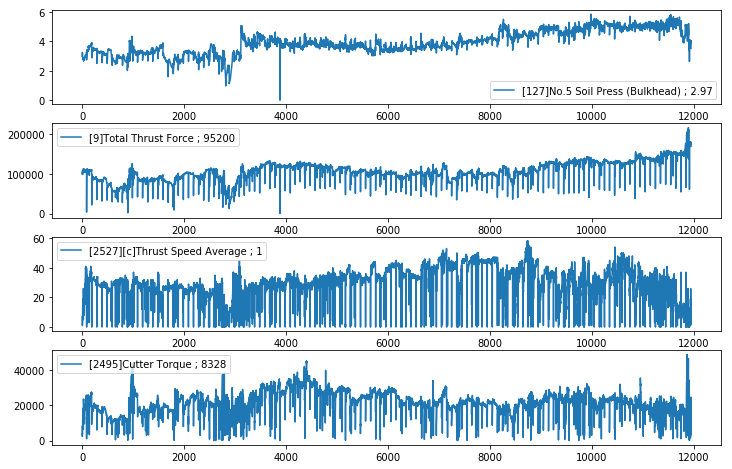

True

In [8]:
series_data,sample_keys = get_series_data(df,['[127]No.5 Soil Press (Bulkhead)',
                                                      '[9]Total Thrust Force',
                                                     '[2527][c]Thrust Speed Average',
                                                     
                                                     '[2495]Cutter Torque'])
plot_multi_series(series_data,title_names=sample_keys)

In [9]:
keys = df.keys()
out_temp_keys = search_k(["circumference","outer","temp"],keys,not_s=[],thre=0.8)
inner_temp_keys = search_k(["circumference","inner","temp"],keys,not_s=[],thre=0.8)
print (inner_temp_keys)

['[211][DEL]#1 Inner Circumference Temp', '[212][DEL]#2 Inner Circumference Temp', '[213][DEL]#3 Inner Circumference Temp', '[214][DEL]#4 Inner Circumference Temp', '[215][DEL]#5 Inner Circumference Temp', '[216][DEL]#6 Inner Circumference Temp', '[217][DEL]#7 Inner Circumference Temp', '[218][DEL]#8 Inner Circumference Temp', '[219][DEL]#9 Inner Circumference Temp', '[220][DEL]#10 Inner Circumference Temp', '[221][DEL]#11 Inner Circumference Temp', '[222][DEL]#12 Inner Circumference Temp', '[223][DEL]#13 Inner Circumference Temp', '[224][DEL]#14 Inner Circumference Temp', '[225][DEL]#15 Inner Circumference Temp', '[226][DEL]#16 Inner Circumference Temp']


In [10]:
df['mean temp outer circumference'] = (df[out_temp_keys].astype('float')).mean(axis = 1)
df['mean temp inner circumference'] = (df[inner_temp_keys].astype('float')).mean(axis = 1)

In [86]:
keys = df.keys()
mean_temp_keys = search_k(["circumference","mean","outer","temp"],keys,not_s=[],thre=0.8)

In [87]:
all_data_keys = mean_temp_keys+['[127]No.5 Soil Press (Bulkhead)',
                                                      '[9]Total Thrust Force',
                                                     '[2527][c]Thrust Speed Average',
                                                     
                                                     '[2495]Cutter Torque']

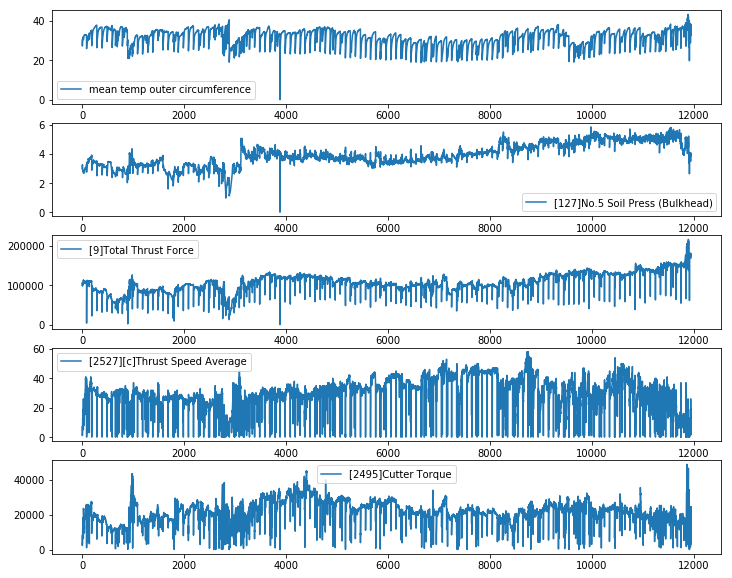

True

In [88]:
series_data,sample_keys = get_series_data(df,all_data_keys)
plot_multi_series(series_data,title_names=all_data_keys)

In [14]:
compute_corr_matrix(series_data)

array([[1.        , 0.94883983],
       [0.94883983, 1.        ]])

# Frequency content analysis 

In [20]:
from scipy.signal import coherence,periodogram
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz

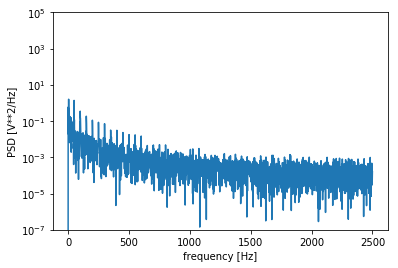

In [49]:
f, Pxx_den = periodogram(series_data[0,:5000],fs = 5000)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e5])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [18]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


In [78]:
fs = 100
cutoff = fs*0.005
test_data1 = series_data[0,:]-series_data[0,:].mean()
test_data2 = series_data[-3,:]-series_data[-3,:].mean()
y = butter_lowpass_filter(test_data, cutoff, fs)

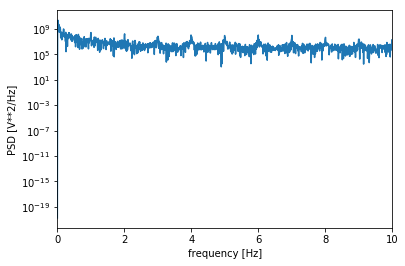

In [85]:
f, Pxx_den_1 = periodogram(test_data1,fs = 100)
f, Pxx_den_2 = periodogram(test_data2,fs = 100)
# plt.semilogy(f, Pxx_den_1)
plt.semilogy(f, Pxx_den_2)
# plt.ylim([1e-7, 1e3])
plt.xlim([0, 10])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [80]:
from scipy.signal import find_peaks
peaks_1, _ = find_peaks(Pxx_den_1, height=10)
peaks_2, _ = find_peaks(Pxx_den_2, height=10)

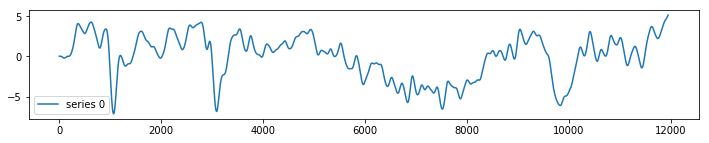

True

In [81]:
plot_multi_series([y])

In [82]:
peaks_1

array([  1,   4,   7,   9,  11,  14,  16,  18, 120, 240, 359])

In [83]:
peaks_2

array([   2,    5,   10, ..., 5963, 5968, 5973])